In [1]:
# Load the packages we shall use
import numpy as np 
import pandas as pd 
import sklearn as skl
from matplotlib import pyplot as pl
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [2]:
# Read the data
train_data= '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
df_train= pd.read_csv(train_data)
#Print first 5 rows 
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Check Which Columns are in the df
print(df_train.columns)
#Find out summary statistics of the DF
df_train.describe()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# Look At Columns that we expect to influence sales price the most
exp_high=['Utilities','Neighborhood','OverallCond','OverallQual','YearRemodAdd','ExterCond','CentralAir','HeatingQC','GrLivArea','FullBath','SalePrice']
exp_high=df_train[exp_high]
exp_high.head()


,Utilities,Neighborhood,OverallCond,OverallQual,YearRemodAdd,ExterCond,CentralAir,HeatingQC,GrLivArea,FullBath,SalePrice
0,AllPub,CollgCr,5,7,2003,TA,Y,Ex,1710,2,208500
1,AllPub,Veenker,8,6,1976,TA,Y,Ex,1262,2,181500
2,AllPub,CollgCr,5,7,2002,TA,Y,Ex,1786,2,223500
3,AllPub,Crawfor,5,7,1970,TA,Y,Gd,1717,1,140000
4,AllPub,NoRidge,5,8,2000,TA,Y,Ex,2198,2,250000


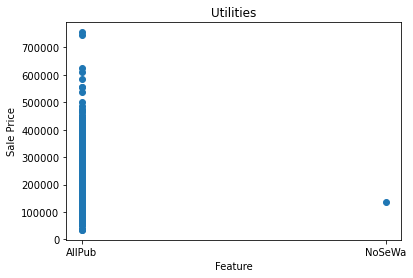

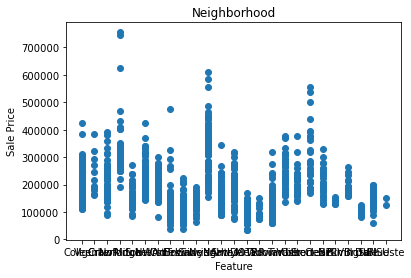

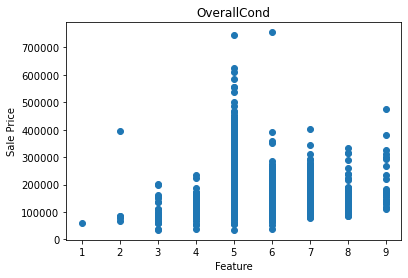

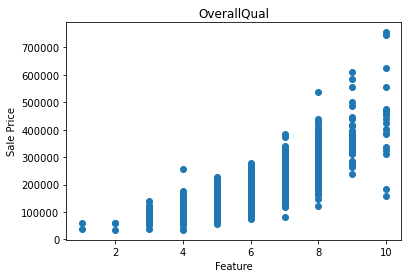

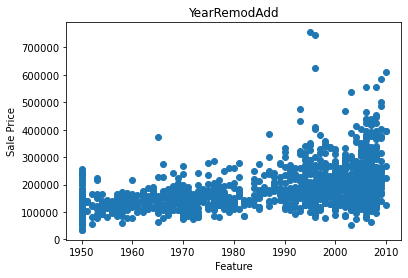

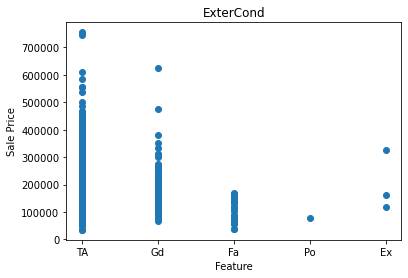

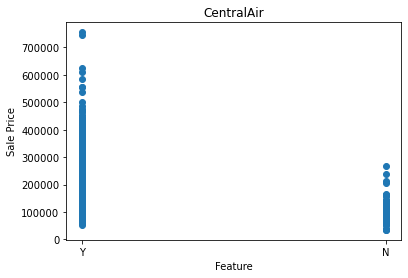

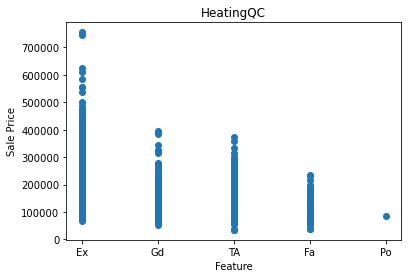

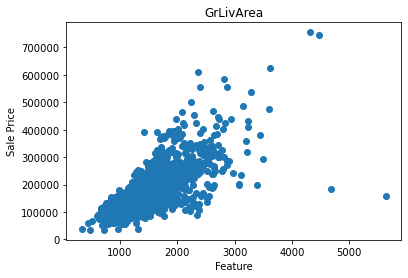

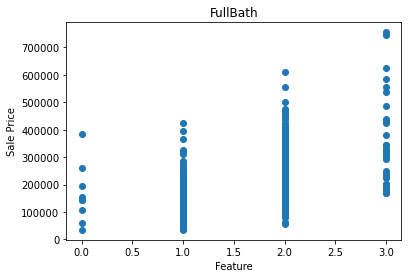

In [5]:
#Draw A Scatter Plot for Each Attribute vs Sales Price
for var in exp_high:
    C=str(var)
    if C!="SalePrice":
        pl.scatter(exp_high[C],exp_high['SalePrice'])
        pl.title(C)
        pl.xlabel('Feature')
        pl.ylabel('Sale Price')
        pl.show()

From the Scatter Plot of unique features we expect to impact the price of a house, we can see which variables seem to have a relationship with Sales Price.

Our Scatter Plot suggests Overall Quality, Year Remodelled, GrLiving Area, and Neighbourhood may have an impact on total sale price. We will dive into this further in a bit. 

First let's be sure there is no other variables that are strongly correlated with Sale Price by plotting a heatmap using sns

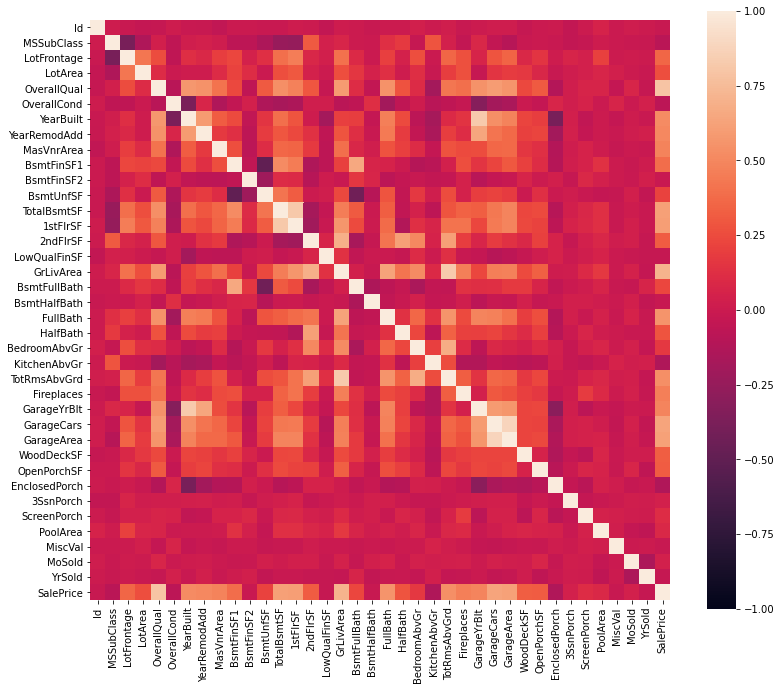

In [6]:
#Correlation Matrix Of all the Data
cor=df_train.corr()
f, ax = pl.subplots(figsize=(13, 11))
sns.heatmap(cor, vmax=1,vmin=-1,square=True)

From the heatmap representing the correlation between Sale Price and all other numerical variables we can see that the following variables seem to have a strong correlation with Sale Price. When we compile all the variables from our expectation analysis earlier and the correlational analysis now we get a total of 9 variables that we shall investigate. We had to eliminate variables that are strongly correlated with each other as this may lead to an overruling of these in our model.  

1. EnclosedPorch
2. KitchenAbvGr
3. Overall Qual
4. Year Remodelled
5. TotalBsmtSF
6. GrLivArea
7. FullBath
8. Garage Area
9. Neighbourhood


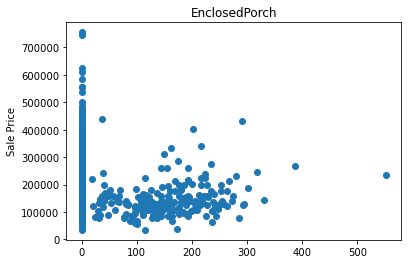

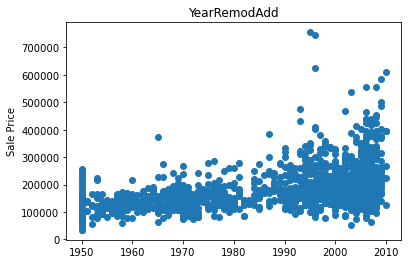

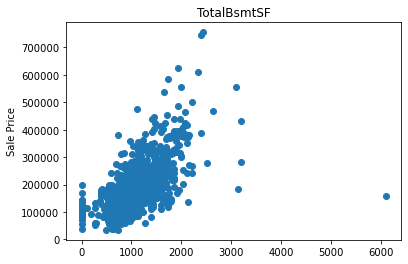

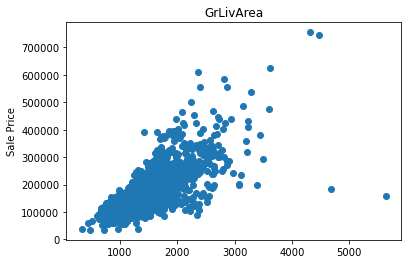

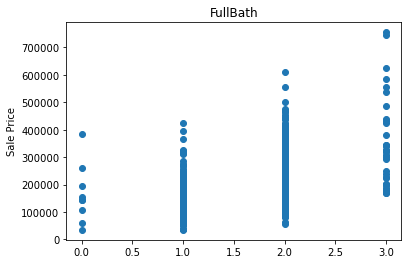

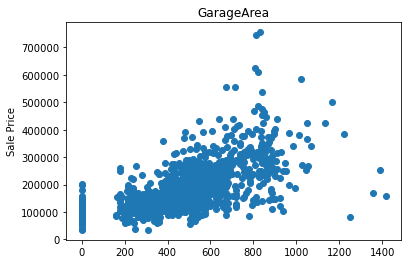

In [7]:
#Our Final 9 varibles that we will invesigate
features=['EnclosedPorch','KitchenAbvGr','OverallQual','YearRemodAdd','TotalBsmtSF','GrLivArea', 'FullBath', 'GarageArea'
,'Neighborhood']
train_X=df_train[features]
y=df_train.SalePrice

#Split Features into numerical and categorical for plotting purposes

num=['EnclosedPorch','YearRemodAdd','TotalBsmtSF','GrLivArea','FullBath','GarageArea']
X_num=train_X[num]
for num in X_num:
    pl.scatter(X_num[num],y)
    pl.title(num)
    pl.ylabel('Sale Price')
    pl.show()

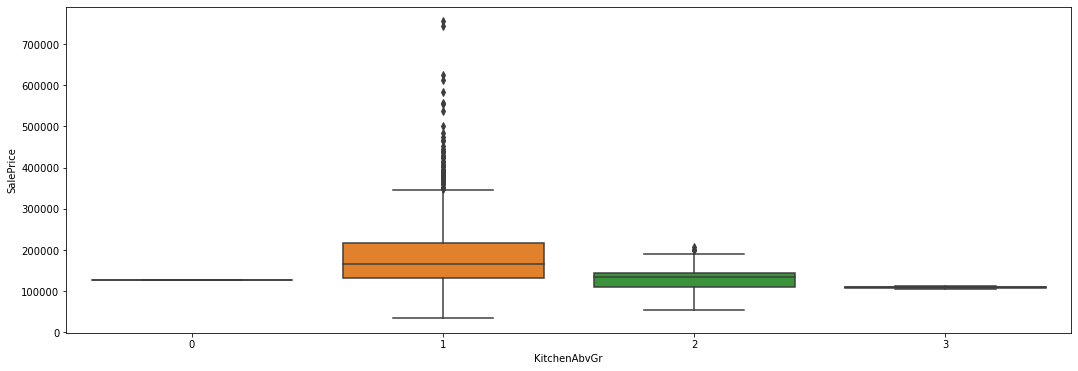

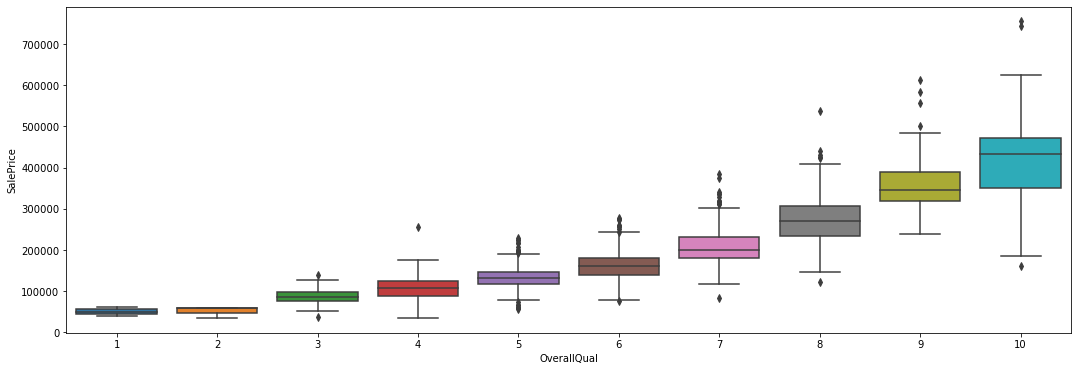

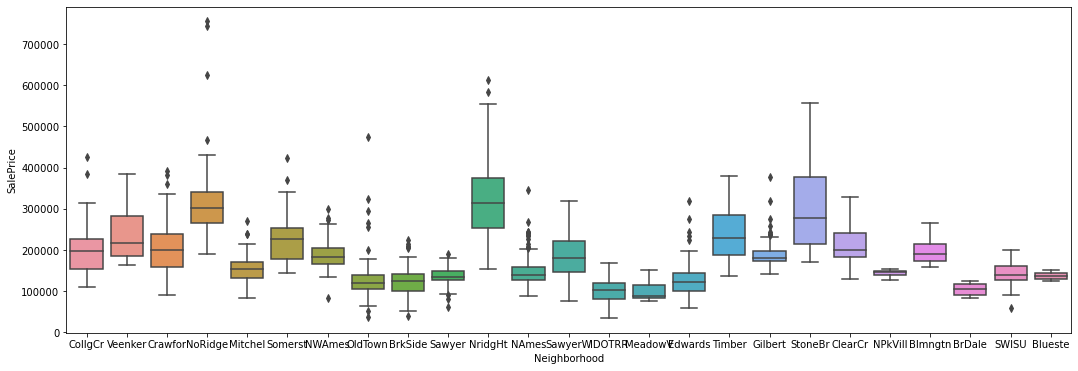

In [8]:
#Plot BoxPlots For Categorical Variables 
cat=['KitchenAbvGr','OverallQual','Neighborhood']
X_cat=train_X[cat]
for X in X_cat:
    f, ax = pl.subplots(figsize=(18, 6))
    sns.boxplot(X_cat[X],y)

Finally before moving on to the development of the models, we shall explore how exactly Sale Prices are distributed. 

Text(0.5, 1.0, 'Distribution of Sale Price')

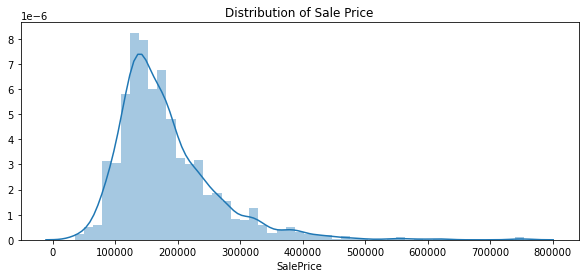

In [9]:
f,ax=pl.subplots(figsize=(10,4))
sns.distplot(y)
pl.title('Distribution of Sale Price')

From the plot above we can observe that the Sale Price of Houses in this city is relatively right skewed. This may be because there are few really rich house owners in the area, however most of the houses are sold at a reasonable price

In [10]:
#Convert Categorical Variables (Neighbour Hood) in Dummies
train_X=pd.get_dummies(train_X)
train_X
#Check for any missing values 
train_X.isnull().sum()

EnclosedPorch           0
KitchenAbvGr            0
OverallQual             0
YearRemodAdd            0
TotalBsmtSF             0
GrLivArea               0
FullBath                0
GarageArea              0
Neighborhood_Blmngtn    0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood_NWAmes     0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
Neighborhood_OldTown    0
Neighborhood_SWISU      0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Neighborhood_StoneBr    0
Neighborhood_Timber     0
Neighborhood_Veenker    0
dtype: int64

Lucky for us we don't have any missing values! So we can go ahead and start the model buliding. We shall bulid three different models:
1. Decision Tree Regressor 
2. Decision Tree Regressor With Max Leaf Nodes optimized 
3. Random Forest Regressor 

In [11]:
# First split our data into training set and a testing set so we can evaluate which model is the best

from sklearn.model_selection import train_test_split
t_X,val_X,t_y,val_y=train_test_split(train_X,y, random_state=1)
#Create the first model
from sklearn.tree import DecisionTreeRegressor
model_1= DecisionTreeRegressor (random_state=1)
model_1.fit(t_X,t_y)
# Compute Mean Absolute Error 
from sklearn.metrics import mean_absolute_error 
model_1_predictions=model_1.predict(val_X)
mae_1= mean_absolute_error(val_y,model_1_predictions)
print ('The Mean Absolute Error for Model 1 is {}'.format(mae_1))

The Mean Absolute Error for Model 1 is 25728.813698630136


In [12]:
# Using model one lets optimize the maximum leaf nodes in order to get the best model that 
# does not over fit or under fit the data

# define a function that allows us to obtain the MAE easily

def get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y):
    model=DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X,train_y)
    predicted = model.predict(val_X)
    return mean_absolute_error(val_y,predicted)

# Create a loop function to find out what maximum leaf nodes are optimal
max_trees=[25,50,100,200,400]

for nodes in max_trees:
    model_mae= get_mae(nodes,t_X,val_X,t_y,val_y)
    print("When we have {} tree nodes, the mean absolute error is: {}".format(nodes,model_mae))

# The optimal leaf nodes lie somewhere between 50 and 200. Lets find out the exact optimal max leaf nodes
optimal_leaf_nodes=[]
for i in range(50,200):
    model_mae=get_mae(i,t_X,val_X,t_y,val_y)
    optimal_leaf_nodes.append(model_mae)
print("The lowest possible MAE is: {}".format(min(optimal_leaf_nodes)))
optimal_MAE=min(optimal_leaf_nodes)
index=optimal_leaf_nodes.index(optimal_MAE)
print("Hence the optimal maximum number of leaf nodes is: {}".format(50+index))

When we have 25 tree nodes, the mean absolute error is: 24493.832068875137
When we have 50 tree nodes, the mean absolute error is: 24344.901744103758
When we have 100 tree nodes, the mean absolute error is: 23721.794600331952
When we have 200 tree nodes, the mean absolute error is: 25132.50882251335
When we have 400 tree nodes, the mean absolute error is: 25583.685182459132
The lowest possible MAE is: 23609.905121922497
Hence the optimal maximum number of leaf nodes is: 98


In [13]:
#Using 98 as our maxmimum number of leaf nodes we shall create our second model:
model_2= DecisionTreeRegressor(max_leaf_nodes=98,random_state=1)
model_2.fit(t_X,t_y)
predicted=model_2.predict(val_X)
mae_2=mean_absolute_error(val_y,predicted)
print ('The Mean Absolute Error for Model 2 is {}'.format(mae_2))

The Mean Absolute Error for Model 2 is 23609.905121922497


In [14]:
# Finally we create an even better third model using the Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
model_3=RandomForestRegressor(random_state=1)
model_3.fit(t_X,t_y)
predicted=model_3.predict(val_X)
mae_3=mean_absolute_error(val_y,predicted)
print ('The Mean Absolute Error for Model 3 is {}'.format(mae_3))

The Mean Absolute Error for Model 3 is 18325.45583637154


In summary here is a breakdown of the models we have created and their respective MAE values:
* Model 1: 25728.813698630136
* Model 2: 23609.905121922497
* Model 3: 18325.45583637154
 
 
 We can clearly see the best model is the Random Forest Regressor (Model 3. We will now develop a Random Forest Regressor on all the data in our training dataset and this will be our final model to submit. 
 


In [15]:
final_model=RandomForestRegressor(random_state=1)
final_model.fit(train_X,y)

RandomForestRegressor(random_state=1)

In [16]:
#Make Predictions On The Test Data and Submit to Competition 
#Load Test Data and extract desired features
test_data_path='/kaggle/input/house-prices-advanced-regression-techniques/test.csv'
test_data=pd.read_csv(test_data_path)
test_X=test_data[features]
test_X=pd.get_dummies(test_X)
#Check for Missing Values 
print(test_X[test_X.isnull().any(axis=1)])

             # 1 row missing Garage Area and 1 row missing Basement SF
# Investigate whether or not these two houses have a garage and basement respectively, if not we can replace NaN with 0       

print(test_data.iloc[1116].GarageType)
#The Garage is detached from the house so we will replace the NaN with a 0
print(test_data.iloc[660].BsmtQual)
#According to the data description nan indicates that there is no basement so again with replace this will a zero

#Fill in these missing values
test_X.fillna(0,inplace=True)

      EnclosedPorch  KitchenAbvGr  OverallQual  YearRemodAdd  TotalBsmtSF  \
660               0             1            4          1950          NaN   
1116            212             1            5          1999        859.0   

      GrLivArea  FullBath  GarageArea  Neighborhood_Blmngtn  \
660         896         1       280.0                     0   
1116       1828         2         NaN                     0   

      Neighborhood_Blueste  ...  Neighborhood_NoRidge  Neighborhood_NridgHt  \
660                      0  ...                     0                     0   
1116                     0  ...                     0                     0   

      Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
660                      0                   0                    0   
1116                     0                   0                    0   

      Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
660                      0                     0    

In [17]:
#Let's finally make predictions on our test dataset!
test_predictions=final_model.predict(test_X)
output=pd.DataFrame({'Id':test_data.Id,
                   'SalePrice':test_predictions})
output.to_csv('submissions.csv',index=False)

**References** 

Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=sample_submission.csv

Inspiration and structure: 
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
https://www.kaggle.com/ezeanyi/house-prices-prediction
https://www.youtube.com/watch?v=I3FBJdiExcg&t=87s